## ETL Pipeline

In [5]:
import numpy as np
import pandas as pd
import requests
import json
import time
import sqlalchemy
from sqlalchemy import exc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import config
# from util import *

In [8]:
## this function calls the Google Books API, passing in search query, subject, 
## API key, and number of calls as the parameter. Each call returns 40 results
def google_books_call(query, subject, api_key, n_calls):
    data = []
    offset = 0
    while n_calls > 0:
        url = f'https://www.googleapis.com/books/v1/volumes?q={query}+subject:{subject}&projection=full&maxResults=40&startIndex={offset}&key={config.googlebooks_api_key}'
        response = requests.request('GET', url, allow_redirects=False)
        load = json.loads(response.text)
        print(load)
        offset += 40
        n_calls -= 1
        time.sleep(1)
        
        ## skips entries with no information
        try:
            data.append(load['items'])
        except KeyError:
            continue

    return data

In [208]:
fiction = google_books_call('', 'fiction', config.googlebooks_api_key, 10)

{'kind': 'books#volumes', 'totalItems': 493, 'items': [{'kind': 'books#volume', 'id': 'n1yUJK_Hzw0C', 'etag': 'MFDFjbHeUhU', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/n1yUJK_Hzw0C', 'volumeInfo': {'title': 'The Litigators', 'authors': ['John Grisham'], 'publisher': 'Dell', 'publishedDate': '2011-10-25', 'description': 'The partners at Finley & Figg often refer to themselves as a “boutique law firm.” Boutique, as in chic, selective, and prosperous. Oscar Finley and Wally Figg are none of these things. They are a two-bit operation of ambulance chasers who bicker like an old married couple. Until change comes their way—or, more accurately, stumbles in. After leaving a fast-track career and going on a serious bender, David Zinc is sober, unemployed, and desperate enough to take a job at Finley & Figg. Now the firm is ready to tackle a case that could make the partners rich—without requiring them to actually practice much law. A class action suit has been brought against Varr

{'kind': 'books#volumes', 'totalItems': 492, 'items': [{'kind': 'books#volume', 'id': 'OYtkbGl2j0sC', 'etag': 'Pgd9GlRrmrI', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/OYtkbGl2j0sC', 'volumeInfo': {'title': 'Fahrenheit 451', 'subtitle': 'A Novel', 'authors': ['Ray Bradbury'], 'publisher': 'Simon and Schuster', 'publishedDate': '2011-11-29', 'description': 'Ray Bradbury’s internationally acclaimed novel Fahrenheit 451 is a masterwork of twentieth-century literature set in a bleak, dystopian future. Ray Bradbury’s internationally acclaimed novel Fahrenheit 451 is a masterwork of twentieth-century literature set in a bleak, dystopian future. Guy Montag is a fireman. In his world, where television rules and literature is on the brink of extinction, firemen start fires rather than put them out. His job is to destroy the most illegal of commodities, the printed book, along with the houses in which they are hidden. Montag never questions the destruction and ruin his actions prod

{'kind': 'books#volumes', 'totalItems': 492, 'items': [{'kind': 'books#volume', 'id': '2zgRDXFWkm8C', 'etag': 'RejIqEJj/xs', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/2zgRDXFWkm8C', 'volumeInfo': {'title': 'Harry Potter y la piedra filosofal', 'authors': ['J.K. Rowling'], 'publisher': 'Pottermore Publishing', 'publishedDate': '2015-12-08', 'description': 'Harry vive con sus horribles tíos y el insoportable primo Dudley, hasta que su ingreso en el Colegio Hogwarts de Magia y Hechicería cambia su vida para siempre. Allí aprenderá trucos y encantamientos fabulosos, y hará un puñado de buenos amigos... aunque también algunos temibles enemigos. Y, sobre todo, conocerá los secretos que lo ayudarán a cumplir con su destino.', 'industryIdentifiers': [{'type': 'ISBN_13', 'identifier': '9781781101315'}, {'type': 'ISBN_10', 'identifier': '1781101310'}], 'readingModes': {'text': True, 'image': True}, 'pageCount': 264, 'printType': 'BOOK', 'categories': ['Fiction'], 'averageRating': 

{'kind': 'books#volumes', 'totalItems': 492, 'items': [{'kind': 'books#volume', 'id': '6dLIeuF4uj8C', 'etag': 'YLCQf69Cd2E', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/6dLIeuF4uj8C', 'volumeInfo': {'title': 'Obras completas', 'authors': ['Pablo Palacio'], 'publisher': 'Editorial Universidad de Costa Rica', 'publishedDate': '2000', 'description': 'La mayo implicaci n de esta edici n cr tica a cargo de Wilfrido H. Corral es la publicaci n de la obras de un autor todav a desconocido fuera de su pa s, una obra que intenta ser lo m s completa e internacional posible, con un equipo formado por especialistas de diferentes pa ses y sistemas intelectuales y socioculturales.', 'industryIdentifiers': [{'type': 'ISBN_10', 'identifier': '2914273010'}, {'type': 'ISBN_13', 'identifier': '9782914273015'}], 'readingModes': {'text': False, 'image': True}, 'pageCount': 620, 'printType': 'BOOK', 'categories': ['Fiction'], 'averageRating': 3.0, 'ratingsCount': 2, 'maturityRating': 'NOT_MATURE

{'kind': 'books#volumes', 'totalItems': 492, 'items': [{'kind': 'books#volume', 'id': 'OQR4BgAAQBAJ', 'etag': 'WKvKjj9ry8A', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/OQR4BgAAQBAJ', 'volumeInfo': {'title': 'Go Set a Watchman', 'subtitle': 'A Novel', 'authors': ['Harper Lee'], 'publisher': 'HarperCollins', 'publishedDate': '2015-07-14', 'description': 'A historic literary event: the publication of a newly discovered novel, the earliest known work from Harper Lee, the beloved, bestselling author of the Pulitzer Prize-winning classic, To Kill a Mockingbird. Originally written in the mid-1950s, Go Set a Watchman was the novel Harper Lee first submitted to her publishers before To Kill a Mockingbird. Assumed to have been lost, the manuscript was discovered in late 2014. Go Set a Watchman features many of the characters from To Kill a Mockingbird some twenty years later. Returning home to Maycomb to visit her father, Jean Louise Finch—Scout—struggles with issues both personal 

{'kind': 'books#volumes', 'totalItems': 491, 'items': [{'kind': 'books#volume', 'id': 'U58WvanMgvYC', 'etag': '52P+CVzBgIU', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/U58WvanMgvYC', 'volumeInfo': {'title': 'Worlds Apart Book 02 - EdenWorld', 'authors': ['James Wittenbach'], 'publisher': 'Booktango', 'publishedDate': '2012-07-06', 'description': "EdenWorld has beer-colored seas, amber skies, and is inhabited by griffins, minotaurs, vampires, werewolves and other fantastic creatures who have enslaved the human population. Commander Bill Keeler and his landing party visit this strange world and start off along a highway paved in golden stones to meet the powerful ruler of a mythical kingdom. Along the way, they encounter a mentally deficient crop guardian, a malfunctioning robot with a failing power cell, and an anthropomorphic lion with cowardice issues. Also, there's a B-Story involving the kidnapping of Goneril Lear's son; a C-Story involving Phil Redfire falling for a h

{'kind': 'books#volumes', 'totalItems': 488, 'items': [{'kind': 'books#volume', 'id': '8ryftjHlsSsC', 'etag': 'gG+LS6QMmEM', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/8ryftjHlsSsC', 'volumeInfo': {'title': 'Half of a Yellow Sun', 'authors': ['Chimamanda Ngozi Adichie'], 'publisher': 'HarperCollins UK', 'publishedDate': '2009-01-19', 'description': 'WINNER OF THE BAILEYS PRIZE BEST OF THE BEST Winner of the Orange Broadband Prize for Fiction 2007, this is a heartbreaking, exquisitely written literary masterpiece', 'industryIdentifiers': [{'type': 'ISBN_13', 'identifier': '9780007279289'}, {'type': 'ISBN_10', 'identifier': '0007279280'}], 'readingModes': {'text': True, 'image': False}, 'pageCount': 448, 'printType': 'BOOK', 'categories': ['Fiction'], 'averageRating': 4.0, 'ratingsCount': 260, 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': True, 'contentVersion': '3.21.17.0.preview.2', 'panelizationSummary': {'containsEpubBubbles': False, 'containsImageBubbles': False}

{'kind': 'books#volumes', 'totalItems': 487, 'items': [{'kind': 'books#volume', 'id': 'yDSCyuSpzjUC', 'etag': 'QUSPDN8itzQ', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/yDSCyuSpzjUC', 'volumeInfo': {'title': 'Trackers', 'authors': ['Deon Meyer'], 'publisher': 'Hachette UK', 'publishedDate': '2011-09-01', 'description': 'A housewife running from years of domestic abuse. A bodyguard hired to escort a smuggled rhinoceros. A group of Islamic terrorists based in a quiet residential street. A secret government agency threatened with amalgamation within a bigger department. A retired policeman trying to get used to his new career in the private sector. Each of these strands of a brilliant narrative is populated with superbly-drawn characters, and woven into a stunningly exciting drama by the undisputed king of South African suspense fiction. Not only a heart-pounding thriller, but also a love story and a fabulous kaleidoscopic picture of South African society, this is the finest 

{'kind': 'books#volumes', 'totalItems': 482, 'items': [{'kind': 'books#volume', 'id': 'ZZs-tDUCnnUC', 'etag': 'O3N5j0fw730', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/ZZs-tDUCnnUC', 'volumeInfo': {'title': 'When We Were Young', 'authors': ['Antony Smith'], 'publisher': 'iUniverse', 'publishedDate': '2012-03-26', 'description': 'Spanning four generations and an infinite range of human emotions, When We Were Young is the story of the Mitchell family, beginning in England at the outbreak of World War II and chronicling the triumphs and tragedies of those tumultuous times. Most of all, it is the story of Jim Mitchell, a young, ambitious English boy, hardened by his wartime experience. Eager to grasp lifes opportunities, he embarks on an adventure peopled by a rich cast of characters he meets along the way. The raven-haired, charismatic, Maggie Bernadette OToole, rebellious daughter of his fathers sister, and her Irish immigrant husband; James Thompson, marine engineer extrao

{'kind': 'books#volumes', 'totalItems': 477, 'items': [{'kind': 'books#volume', 'id': 'ExzkzyeMA_MC', 'etag': '4zZkDjKj1mc', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/ExzkzyeMA_MC', 'volumeInfo': {'title': 'A Benwarian Fix', 'subtitle': 'The Intercolonization of Earth', 'authors': ['L. W. Samuelson'], 'publisher': 'iUniverse', 'publishedDate': '2009-09-28', 'description': '"A Benwarian Fix" is about an alien race that lost their planet due to environmental indifference. It follows a small group of aliens as they embark on a journey aboard a sentient spaceship. They arrive on Earth to find that it is in much the same condition as their own planet. With their superior technology and knowledge about the environment, they decide on a course of action to save Mother Earth. Their leader, Logis, deals with his conflicting emotions as he has to put aside his morality to ensure the survival of his people. What is their plan to save earth? Will the human race survive an alien onsl

In [46]:
machine_learning = google_books_call('data science machine learning', '', config.googlebooks_api_key, 10)
art = google_books_call('', 'art', config.googlebooks_api_key, 10)
world_war_2 = google_books_call('world war 2', '', config.googlebooks_api_key, 10)
philosophy = google_books_call('', 'philosophy', config.googlebooks_api_key, 10)
economics = google_books_call('', 'economics', config.googlebooks_api_key, 10)
poetry = google_books_call('', 'poetry', config.googlebooks_api_key, 10)
history = google_books_call('', 'history', config.googlebooks_api_key, 10)
science = google_books_call('', 'science', config.googlebooks_api_key, 10)
computers = google_books_call('', 'computers', config.googlebooks_api_key, 10)
mathematics = google_books_call('', 'mathematics', config.googlebooks_api_key, 10)
psychology = google_books_call('', 'psychology', config.googlebooks_api_key, 10)
drama = google_books_call('', 'drama', config.googlebooks_api_key, 10)
travel = google_books_call('', 'travel', config.googlebooks_api_key, 10)
religion = google_books_call('', 'religion', config.googlebooks_api_key, 10)
biography = google_books_call('', 'biography', config.googlebooks_api_key, 10)
architecture = google_books_call('', 'architecture', config.googlebooks_api_key, 10)
cooking = google_books_call('', 'cooking', config.googlebooks_api_key, 10)
education = google_books_call('', 'education', config.googlebooks_api_key, 10)
children = google_books_call('', 'children', config.googlebooks_api_key, 8)



{'kind': 'books#volumes', 'totalItems': 497, 'items': [{'kind': 'books#volume', 'id': 'NtWXM2MM9t4C', 'etag': 'ybwGAUcLHVw', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/NtWXM2MM9t4C', 'volumeInfo': {'title': 'Geometric Methods in Inverse Problems and PDE Control', 'authors': ['Chrisopher B. Croke', 'Gunther Uhlmann', 'Irena Lasiecka', 'Michael Vogelius'], 'publisher': 'Springer Science & Business Media', 'publishedDate': '2004-02-26', 'description': 'This volume contains a selection of articles based on lectures delivered at the IMA 2001 Summer Program on Geometric Methods in Inverse Problems and PDE Control. The articles are focused around a set of common tools used in the study of inverse coefficient and control problems for PDEs and related differential geometric problems. This book will serve as an excellent starting point for researchers wanting to pursue studies at the intersection of these mathematically exciting and practically important subjects.', 'industryIdenti

{'kind': 'books#volumes', 'totalItems': 495, 'items': [{'kind': 'books#volume', 'id': '5obZnfK5pbsC', 'etag': '92KlVv9COfo', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/5obZnfK5pbsC', 'volumeInfo': {'title': 'The Essential Guide to Effect Sizes', 'subtitle': 'Statistical Power, Meta-Analysis, and the Interpretation of Research Results', 'authors': ['Paul D. Ellis'], 'publisher': 'Cambridge University Press', 'publishedDate': '2010-07-01', 'description': 'A jargon-free introduction for students and researchers looking to interpret the practical significance of their results.', 'industryIdentifiers': [{'type': 'ISBN_13', 'identifier': '9780521142465'}, {'type': 'ISBN_10', 'identifier': '0521142466'}], 'readingModes': {'text': False, 'image': True}, 'pageCount': 173, 'printType': 'BOOK', 'categories': ['Business & Economics'], 'averageRating': 4.0, 'ratingsCount': 1, 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': False, 'contentVersion': 'preview-1.0.0', 'imageLinks': {'

{'kind': 'books#volumes', 'totalItems': 493, 'items': [{'kind': 'books#volume', 'id': '1OiULlanEzMC', 'etag': 'Tc09fVCW1ko', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/1OiULlanEzMC', 'volumeInfo': {'title': 'The Hardy-Littlewood Method', 'authors': ['R. C. Vaughan'], 'publisher': 'Cambridge University Press', 'publishedDate': '1997-01-16', 'description': 'This second edition covers recent developments on Hardy-Littlewood method.', 'industryIdentifiers': [{'type': 'ISBN_10', 'identifier': '0521573475'}, {'type': 'ISBN_13', 'identifier': '9780521573474'}], 'readingModes': {'text': False, 'image': True}, 'pageCount': 232, 'printType': 'BOOK', 'categories': ['Mathematics'], 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': False, 'contentVersion': '0.2.0.0.preview.1', 'panelizationSummary': {'containsEpubBubbles': False, 'containsImageBubbles': False}, 'imageLinks': {'smallThumbnail': 'http://books.google.com/books/content?id=1OiULlanEzMC&printsec=frontcover&img=1&zoom=5&ed

{'kind': 'books#volumes', 'totalItems': 493, 'items': [{'kind': 'books#volume', 'id': 'e13xPeDetesC', 'etag': 'WsE+OU7VKgM', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/e13xPeDetesC', 'volumeInfo': {'title': 'Doing Math in Morning Meeting', 'subtitle': '150 Quick Activities That Connect to Your Curriculum', 'authors': ['Andy Dousis', 'Margaret Berry Wilson'], 'publisher': 'Center for Responsive Schools, Inc.', 'publishedDate': '2010', 'description': "Bring joy and energy to math learning without adding to your already-packed schedule! Here are 150 fun and engaging math activities suitable for kindergartners to 5th graders, with math-themed ideas for all four Morning Meeting components: greeting, group activity, sharing, and morning message. Use these games, songs, chants, hands-on experiments, and more to inspire students' interest in math and help them practice skills. Each activity includes easy how-to steps; relevant NCTM content and process standards; specific math ski

{'kind': 'books#volumes', 'totalItems': 493, 'items': [{'kind': 'books#volume', 'id': 'M0tkw4oUucoC', 'etag': 'YleCXoC6GZU', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/M0tkw4oUucoC', 'volumeInfo': {'title': 'A First Course in the Numerical Analysis of Differential Equations', 'authors': ['A. Iserles'], 'publisher': 'Cambridge University Press', 'publishedDate': '2009', 'description': 'lead the reader to a theoretical understanding of the subject without neglecting its practical aspects. The outcome is a textbook that is mathematically honest and rigorous and provides its target audience with a wide range of skills in both ordinary and partial differential equations." --Book Jacket.', 'industryIdentifiers': [{'type': 'ISBN_13', 'identifier': '9780521734905'}, {'type': 'ISBN_10', 'identifier': '0521734908'}], 'readingModes': {'text': False, 'image': True}, 'pageCount': 459, 'printType': 'BOOK', 'categories': ['Mathematics'], 'averageRating': 4.0, 'ratingsCount': 1, 'maturit

{'kind': 'books#volumes', 'totalItems': 493, 'items': [{'kind': 'books#volume', 'id': 'wRKBBwAAQBAJ', 'etag': 'hSBMVSKRWwM', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/wRKBBwAAQBAJ', 'volumeInfo': {'title': 'Analysis 2', 'subtitle': 'Anwendungsorientierte Mathematik Integralrechnung, Reihen, Differentialgleichungen', 'authors': ['Gert Böhme'], 'publisher': 'Springer-Verlag', 'publishedDate': '2013-11-27', 'description': 'Analysis 2 behandelt den "klassischen" Stoff in der Weise, wie ihn der Anwender, der Ingenieur, Informatiker oder Wirtschaftswissenschaftler im Beruf benötigt: - Integralrechnung - Unendliche Reihen (speziell Fourier-Reihen) - Gewöhnliche Differentialrechnungen (einschließlich Laplace-Transformation) Das Maß der Abstraktion ist bewußt gering gehalten. Methodische und anschauliche Beschreibungen erleichtern den Zugang ebenso wie Übungsaufgaben mit vollständigen Lösungen. Das Lehrbuch basiert auf den langjährigen Lehrerfahrungen des Autors und zeichnet sich

{'kind': 'books#volumes', 'totalItems': 492, 'items': [{'kind': 'books#volume', 'id': '5utN7ulkCCAC', 'etag': 'uIuy9ZcAXko', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/5utN7ulkCCAC', 'volumeInfo': {'title': 'Statistical Method from the Viewpoint of Quality Control', 'authors': ['Walter A. Shewhart'], 'publisher': 'Courier Corporation', 'publishedDate': '2012-07-31', 'description': 'Important text offers lucid explanation of how to regulate variables and maintain control over statistics in order to achieve quality control over manufactured products, crops and data. First inexpensive paperback edition.', 'industryIdentifiers': [{'type': 'ISBN_13', 'identifier': '9780486170879'}, {'type': 'ISBN_10', 'identifier': '048617087X'}], 'readingModes': {'text': True, 'image': True}, 'pageCount': 176, 'printType': 'BOOK', 'categories': ['Mathematics'], 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': True, 'contentVersion': '0.7.7.0.preview.3', 'panelizationSummary': {'containsEpu

{'kind': 'books#volumes', 'totalItems': 485, 'items': [{'kind': 'books#volume', 'id': 'zdpQAAAAMAAJ', 'etag': '1b6rEOdgab8', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/zdpQAAAAMAAJ', 'volumeInfo': {'title': 'The statistical analysis of failure time data', 'authors': ['J. D. Kalbfleisch', 'Ross L. Prentice'], 'publisher': 'Wiley-Interscience', 'publishedDate': '1980', 'description': "Synthesizes statistical models and methods for the analysis of failure time or ''survival'' data. Focuses on regression problems with survival data, specifically the estimation of regression coefficients and distributional shape in the presence of shaping. Deals with the theory, applications and extensions of the proportional hazards model. Includes worked examples and problems for solution.", 'industryIdentifiers': [{'type': 'ISBN_10', 'identifier': '0471055190'}, {'type': 'ISBN_13', 'identifier': '9780471055198'}], 'readingModes': {'text': False, 'image': False}, 'pageCount': 321, 'printType

{'kind': 'books#volumes', 'totalItems': 484, 'items': [{'kind': 'books#volume', 'id': 'ExwuDwAAQBAJ', 'etag': 'N0f0ivTxTS8', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/ExwuDwAAQBAJ', 'volumeInfo': {'title': 'Graphs, Matrices, and Designs', 'authors': ['Rees'], 'publisher': 'Routledge', 'publishedDate': '2017-07-12', 'description': 'Examines partitions and covers of graphs and digraphs, latin squares, pairwise balanced designs with prescribed block sizes, ranks and permanents, extremal graph theory, Hadamard matrices and graph factorizations. This book is designed to be of interest to applied mathematicians, computer scientists and communications researchers.', 'industryIdentifiers': [{'type': 'ISBN_13', 'identifier': '9781351444378'}, {'type': 'ISBN_10', 'identifier': '1351444379'}], 'readingModes': {'text': True, 'image': True}, 'pageCount': 344, 'printType': 'BOOK', 'categories': ['Mathematics'], 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': False, 'contentVersion

{'kind': 'books#volumes', 'totalItems': 397, 'items': [{'kind': 'books#volume', 'id': 'A0sSswEACAAJ', 'etag': 'EgQJj+ohTrs', 'selfLink': 'https://www.googleapis.com/books/v1/volumes/A0sSswEACAAJ', 'volumeInfo': {'title': 'Introduction to Smooth Manifolds', 'authors': ['John M. Lee'], 'publishedDate': '2014-01-15', 'industryIdentifiers': [{'type': 'ISBN_10', 'identifier': '1475756011'}, {'type': 'ISBN_13', 'identifier': '9781475756012'}], 'readingModes': {'text': False, 'image': False}, 'pageCount': 652, 'printType': 'BOOK', 'averageRating': 5.0, 'ratingsCount': 1, 'maturityRating': 'NOT_MATURE', 'allowAnonLogging': False, 'contentVersion': 'preview-1.0.0', 'imageLinks': {'smallThumbnail': 'http://books.google.com/books/content?id=A0sSswEACAAJ&printsec=frontcover&img=1&zoom=5&source=gbs_api', 'thumbnail': 'http://books.google.com/books/content?id=A0sSswEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api'}, 'language': 'en', 'previewLink': 'http://books.google.com/books?id=A0sSswEACAA

In [204]:
fiction[0][0]['volumeInfo']

{'title': 'The Litigators',
 'authors': ['John Grisham'],
 'publisher': 'Dell',
 'publishedDate': '2011-10-25',
 'description': 'The partners at Finley & Figg often refer to themselves as a “boutique law firm.” Boutique, as in chic, selective, and prosperous. Oscar Finley and Wally Figg are none of these things. They are a two-bit operation of ambulance chasers who bicker like an old married couple. Until change comes their way—or, more accurately, stumbles in. After leaving a fast-track career and going on a serious bender, David Zinc is sober, unemployed, and desperate enough to take a job at Finley & Figg. Now the firm is ready to tackle a case that could make the partners rich—without requiring them to actually practice much law. A class action suit has been brought against Varrick Labs, a pharmaceutical giant with annual sales of $25 billion, alleging that Krayoxx, its most popular drug, causes heart attacks. Wally smells money. All Finley & Figg has to do is find a handful of Kra

In [8]:
fiction[0][0]['saleInfo']

{'country': 'US',
 'saleability': 'FOR_SALE',
 'isEbook': True,
 'listPrice': {'amount': 9.99, 'currencyCode': 'USD'},
 'retailPrice': {'amount': 9.99, 'currencyCode': 'USD'},
 'buyLink': 'https://play.google.com/store/books/details?id=n1yUJK_Hzw0C&rdid=book-n1yUJK_Hzw0C&rdot=1&source=gbs_api',
 'offers': [{'finskyOfferType': 1,
   'listPrice': {'amountInMicros': 9990000.0, 'currencyCode': 'USD'},
   'retailPrice': {'amountInMicros': 9990000.0, 'currencyCode': 'USD'},
   'giftable': True}]}

In [10]:
vol_keys = ['title', 'subtitle', 'authors', 'publisher', 'categories', 
            'averageRating', 'ratingsCount', 'readingModes', 'pageCount', 
            'publishedDate', 'description']
sale_keys = ['isEbook', 'listPrice']

In [11]:
def filter_keys(data, keys):
    return{key: data[key] if key in data.keys() else None for key in keys}

In [12]:
def parse_books(data, keys1, keys2):
    volumes = []
    for item in data:
        for book in item:
            volInfo = book['volumeInfo']
            voldict = filter_keys(keys=keys1, data=volInfo)
            if type(voldict['readingModes']) is dict:
                    voldict['readingModes'] = voldict['readingModes']['image']
            saleInfo = book['saleInfo']
            saledict = filter_keys(keys=keys2, data=saleInfo)
            if type(saledict['listPrice']) is dict:
                saledict['listPrice'] = saledict['listPrice']['amount']
            bigdict = {**voldict, **saledict}
            volumes.append(bigdict)
    return volumes

In [212]:
## inspect df
df_fiction = pd.DataFrame(parse_books(fiction, vol_keys, sale_keys))
df_fiction.head()

title                           subtitle  \
0           The Litigators                               None   
1                  Ragtime                            A Novel   
2       The House of Mirth  Easyread Super Large 18pt Edition   
3   Davie Henderson Bundle                               None   
4  Prophète dans le désert           essais sur Patrick White   

             authors                  publisher categories  averageRating  \
0     [John Grisham]                       Dell  [Fiction]            3.5   
1    [E.L. Doctorow]               Random House  [Fiction]            3.5   
2    [Edith Wharton]         ReadHowYouWant.com  [Fiction]            NaN   
3  [Davie Henderson]      Medallion Media Group  [Fiction]            NaN   
4       [David Coad]  Presses Univ. Septentrion       None            NaN   

   ratingsCount  readingModes  pageCount publishedDate  \
0         137.0         False      496.0    2011-10-25   
1          57.0          True      336.0    2010-11-17   
2           NaN          True      344.0    2008-11-05   
3           NaN          True      686.0    2012-11-01   
4           NaN          True      142.0    1997-01-01   

                                         description  isEbook  listPrice  
0  The partners at Finley & Figg often refer to t...     True       9.99  
1  Selected by the Modern Library as one of the 1...     True      14.99  
2  Books for All Kinds of Readers Read HowYouWant...    False        NaN  
3  Tomorrow’s World There are no more butterflies...    False        NaN  
4                                               None    False        NaN

In [13]:
def handle_list(x):
    if type(x) == list:
        return ', '.join(x)
    else:
        return x

In [14]:
def clean_df(df):    
    df = df[~df.categories.isnull()]

    df['authors'] = df['authors'].apply(lambda x: handle_list(x))
    df['categories'] = df['categories'].apply(lambda x: handle_list(x))
    
    df['title'] = df['title'].str.replace('"', '')
    df['publisher'] = df['publisher'].str.replace('"', '')

    df.dropna(subset=['publishedDate'], inplace=True)
    df['publishedDate'] = df['publishedDate'].str.replace('*', '')
    
    df = df[(df['publishedDate'] != '1644') & (df['publishedDate'] != '1495') & 
            (df['publishedDate'] != '1552') & (df['publishedDate'] != '200?')]
    df['month'] = (pd.to_datetime(df['publishedDate'], utc=True).dt.month).astype(int)
    df['year'] = pd.to_datetime(df['publishedDate'], utc=True).dt.year

    df.rename(columns={"readingModes": "images"}, inplace=True)

    df = df[['title', 'subtitle', 'authors', 'publisher', 'month', 'year', 
             'categories', 'pageCount', 'listPrice', 'images', 'isEbook', 
             'ratingsCount', 'averageRating', 'description']]
    df = df[(df['ratingsCount'] >= 1) & (df['year'] >= 2009)]
    return df

In [215]:
## cleaned df
df_fiction = clean_df(df_fiction)
df_fiction['categories'] = 'Fiction'
print(df_fiction.shape)
df_fiction.head()


(187, 14)


/Users/michaeleby1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/michaeleby1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/michaeleby1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

title               subtitle               authors  \
0     The Litigators                   None          John Grisham   
1            Ragtime                A Novel         E.L. Doctorow   
5    Her Perfect Man                   None      Mary Lynn Baxter   
8   The Vanished Man  A Lincoln Rhyme Novel        Jeffery Deaver   
16        One Sunday                A Novel  Carrie Gerlach Cecil   

             publisher  month  year categories  pageCount  listPrice  images  \
0                 Dell     10  2011    Fiction      496.0       9.99   False   
1         Random House     11  2010    Fiction      336.0      14.99    True   
5           Silhouette      5  2011    Fiction      192.0       3.99   False   
8   Simon and Schuster      8  2012    Fiction      577.0        NaN   False   
16  Simon and Schuster      2  2013    Fiction      255.0        NaN   False   

    isEbook  ratingsCount  averageRating  \
0      True         137.0            3.5   
1      True          57.0            3.5   
5      True           1.0            5.0   
8     False          19.0            4.0   
16    False           6.0            4.0   

                                          description  
0   The partners at Finley & Figg often refer to t...  
1   Selected by the Modern Library as one of the 1...  
5   One look at firebrand Katherine Mays and Bryce...  
8   Hunting down a killer and master illusionist w...  
16  When her unborn child's health is put at risk,...

In [47]:
make dataframe from each API call and clean them with parse_books() function
df_machine_learning = clean_df(pd.DataFrame(parse_books(machine_learning, vol_keys, sale_keys)))
df_machine_learning['categories'] = 'Machine Learning'

df_art = clean_df(pd.DataFrame(parse_books(art, vol_keys, sale_keys)))
df_art['categories'] = 'Art'

df_world_war_2 = clean_df(pd.DataFrame(parse_books(world_war_2, vol_keys, sale_keys)))
df_world_war_2['categories'] = 'History'

df_philosophy = clean_df(pd.DataFrame(parse_books(philosophy, vol_keys, sale_keys)))
df_philosophy['categories'] = 'Philosophy'

df_economics = clean_df(pd.DataFrame(parse_books(economics, vol_keys, sale_keys)))
df_economics['categories'] = 'Economics'

df_poetry = clean_df(pd.DataFrame(parse_books(poetry, vol_keys, sale_keys)))
df_poetry['categories'] = 'Poetry'

df_history = clean_df(pd.DataFrame(parse_books(history, vol_keys, sale_keys)))
df_history['categories'] = 'History'

df_science = clean_df(pd.DataFrame(parse_books(science, vol_keys, sale_keys)))
df_science['categories'] = 'Science'

df_computers = clean_df(pd.DataFrame(parse_books(computers, vol_keys, sale_keys)))
df_computers['categories'] = 'Computing'

df_mathematics = clean_df(pd.DataFrame(parse_books(mathematics, vol_keys, sale_keys)))
df_mathematics['categories'] = 'Mathematics'

df_psychology = clean_df(pd.DataFrame(parse_books(psychology, vol_keys, sale_keys)))
df_psychology['categories'] = 'Psychology'

df_drama = clean_df(pd.DataFrame(parse_books(drama, vol_keys, sale_keys)))
df_drama['categories'] = 'Drama'

df_travel = clean_df(pd.DataFrame(parse_books(travel, vol_keys, sale_keys)))
df_travel['categories'] = 'Travel'

df_religion = clean_df(pd.DataFrame(parse_books(religion, vol_keys, sale_keys)))
df_religion['categories'] = 'Religion'

df_biography = clean_df(pd.DataFrame(parse_books(biography, vol_keys, sale_keys)))
df_biography['categories'] = 'Biography'

df_architecture = clean_df(pd.DataFrame(parse_books(architecture, vol_keys, sale_keys)))
df_architecture['categories'] = 'Architecture'

df_cooking = clean_df(pd.DataFrame(parse_books(cooking, vol_keys, sale_keys)))
df_cooking['categories'] = 'cooking'

df_education = clean_df(pd.DataFrame(parse_books(education, vol_keys, sale_keys)))
df_education['categories'] = 'Education'

df_children = clean_df(pd.DataFrame(parse_books(children, vol_keys, sale_keys)))
df_children['categories'] = 'Children'

/Users/michaeleby1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/michaeleby1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/michaeleby1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [326]:
df_fiction.to_csv('fiction.csv')
df_machine_learning.to_csv('machine_learning.csv')
df_art.to_csv('art.csv')
df_philosophy.to_csv('philosophy.csv')
df_economics.to_csv('economics.csv')
df_poetry.to_csv('poetry.csv')
df_history.to_csv('history.csv')
df_science.to_csv('science.csv')
df_computers.to_csv('computers.csv')
df_psychology.to_csv('psychology.csv')
df_drama.to_csv('drama.csv')
df_travel.to_csv('travel.csv')
df_religion.to_csv('religion.csv')
df_biography.to_csv('biography.csv')
df_cooking.to_csv('cooking.csv')
df_education.to_csv('education.csv')
df_children.to_csv('children.csv')

In [319]:
# merge all dataframes into one large dataframe and drop duplicates

df = pd.concat([df_fiction, df_machine_learning, df_art, df_world_war_2, 
                df_philosophy, df_economics, df_poetry, df_history, df_science, 
                df_computers, df_psychology, df_drama, df_travel, df_religion,
                df_biography, df_architecture, df_cooking, df_education, 
                df_children], ignore_index=True)
df = df.drop_duplicates(subset='title')
df.to_csv('google_books_all.csv')
print(df.shape)
df.head()

(1078, 14)


title               subtitle               authors  \
0    The Litigators                   None          John Grisham   
1           Ragtime                A Novel         E.L. Doctorow   
2   Her Perfect Man                   None      Mary Lynn Baxter   
3  The Vanished Man  A Lincoln Rhyme Novel        Jeffery Deaver   
4        One Sunday                A Novel  Carrie Gerlach Cecil   

            publisher  month  year categories  pageCount  listPrice  images  \
0                Dell     10  2011    Fiction      496.0       9.99   False   
1        Random House     11  2010    Fiction      336.0      14.99    True   
2          Silhouette      5  2011    Fiction      192.0       3.99   False   
3  Simon and Schuster      8  2012    Fiction      577.0        NaN   False   
4  Simon and Schuster      2  2013    Fiction      255.0        NaN   False   

   isEbook  ratingsCount  averageRating  \
0     True         137.0            3.5   
1     True          57.0            3.5   
2     True           1.0            5.0   
3    False          19.0            4.0   
4    False           6.0            4.0   

                                         description  
0  The partners at Finley & Figg often refer to t...  
1  Selected by the Modern Library as one of the 1...  
2  One look at firebrand Katherine Mays and Bryce...  
3  Hunting down a killer and master illusionist w...  
4  When her unborn child's health is put at risk,...

In [320]:
print(df.categories.value_counts(), 
      '\n\n' f'Number of missing prices: {df.listPrice.isnull().sum()}')

Fiction             187
Travel               96
cooking              88
Religion             72
History              72
Computing            67
Psychology           66
World War 2          65
Machine Learning     63
Science              60
Philosophy           50
Poetry               44
Biography            39
Drama                35
Art                  26
Children             25
Economics            17
Education             6
Name: categories, dtype: int64 

Number of missing prices: 575


### 1a. MySQL Workbench import

In [37]:
engine = sqlalchemy.create_engine(f'mysql://{config.user}:{config.password}@{config.host}')

In [38]:
try:
    engine.execute("CREATE DATABASE books")
    engine.execute("USE books")
except exc.SQLAlchemyError:
    print('Database already exists')

Database already exists


In [39]:
df.to_sql(con=engine, schema='books', name='books', if_exists='replace')

### 1b. More cleaning

In [3]:
df = pd.read_csv('google_books.csv')
df.head()

title               subtitle               authors  \
0    The Litigators                    NaN          John Grisham   
1           Ragtime                A Novel         E.L. Doctorow   
2   Her Perfect Man                    NaN      Mary Lynn Baxter   
3  The Vanished Man  A Lincoln Rhyme Novel        Jeffery Deaver   
4        One Sunday                A Novel  Carrie Gerlach Cecil   

            publisher  month  year categories  pageCount  listPrice  images  \
0                Dell     10  2011    Fiction        496       9.99   False   
1        Random House     11  2010    Fiction        336      14.99    True   
2          Silhouette      5  2011    Fiction        192       3.99   False   
3  Simon and Schuster      8  2012    Fiction        577        NaN   False   
4  Simon and Schuster      2  2013    Fiction        255        NaN   False   

   isEbook  ratingsCount  averageRating  \
0     True           137            3.5   
1     True            57            3.5   
2     True             1            5.0   
3    False            19            4.0   
4    False             6            4.0   

                                         description  
0  The partners at Finley & Figg often refer to t...  
1  Selected by the Modern Library as one of the 1...  
2  One look at firebrand Katherine Mays and Bryce...  
3  Hunting down a killer and master illusionist w...  
4  When her unborn child's health is put at risk,...

In [36]:
df.authors.value_counts()[:10]

Bill Bryson            4
Jojo Moyes             4
Paulo Coelho           4
William Shakespeare    3
J.K. Rowling           3
Francis D. K. Ching    3
Joseph Prince          2
Zed A. Shaw            2
Tristan Gooley         2
David Mamet            2
Name: authors, dtype: int64

In [42]:
df.categories.value_counts()

Fiction         187
History         137
Computing       130
Travel           96
Cooking          88
Religion         72
Psychology       66
Science          60
Philosophy       50
Poetry           44
Biography        39
Drama            35
Art              26
Children         25
Architecture     22
Economics        17
Education         6
Name: categories, dtype: int64

In [33]:
df['categories'] = df['categories'].replace('World War 2', 'History')
df['categories'] = df['categories'].replace('Machine Learning', 'Computing')
df['categories'] = df['categories'].replace('cooking', 'Cooking')

In [38]:
df = pd.concat([df, df_architecture])

In [39]:
df.shape

(1102, 14)

In [40]:
df = df.drop_duplicates(subset='title')


In [41]:
df.shape

(1100, 14)

In [45]:
df.categories.value_counts()

Fiction         187
History         137
Computing       130
Travel           96
Cooking          88
Religion         72
Psychology       66
Science          60
Philosophy       50
Poetry           44
Biography        39
Drama            35
Art              26
Children         25
Architecture     22
Economics        17
Education         6
Name: categories, dtype: int64

In [50]:
df = pd.concat([df, df_mathematics])

In [51]:
df.shape

(1142, 14)

In [52]:
df = df.drop_duplicates(subset='title')
df.shape

(1132, 14)

In [54]:
df.categories.value_counts()

Fiction         187
History         137
Computing       130
Travel           96
Cooking          88
Religion         72
Psychology       66
Science          60
Philosophy       50
Poetry           44
Biography        39
Drama            35
Mathematics      32
Art              26
Children         25
Architecture     22
Economics        17
Education         6
Name: categories, dtype: int64

In [12]:
df['pageCount'].isna().sum()

16

In [31]:
df.dropna(subset=['pageCount'], inplace=True)


In [33]:
df['pageCount'] = df['pageCount'].astype('int')
df['ratingsCount'] = df['ratingsCount'].astype('int')

In [34]:
print(df.shape)
df.head()

(1116, 14)


title               subtitle               authors  \
0    The Litigators                    NaN          John Grisham   
1           Ragtime                A Novel         E.L. Doctorow   
2   Her Perfect Man                    NaN      Mary Lynn Baxter   
3  The Vanished Man  A Lincoln Rhyme Novel        Jeffery Deaver   
4        One Sunday                A Novel  Carrie Gerlach Cecil   

            publisher  month  year categories  pageCount  listPrice  images  \
0                Dell     10  2011    Fiction        496       9.99   False   
1        Random House     11  2010    Fiction        336      14.99    True   
2          Silhouette      5  2011    Fiction        192       3.99   False   
3  Simon and Schuster      8  2012    Fiction        577        NaN   False   
4  Simon and Schuster      2  2013    Fiction        255        NaN   False   

   isEbook  ratingsCount  averageRating  \
0     True           137            3.5   
1     True            57            3.5   
2     True             1            5.0   
3    False            19            4.0   
4    False             6            4.0   

                                         description  
0  The partners at Finley & Figg often refer to t...  
1  Selected by the Modern Library as one of the 1...  
2  One look at firebrand Katherine Mays and Bryce...  
3  Hunting down a killer and master illusionist w...  
4  When her unborn child's health is put at risk,...

In [35]:
df.to_csv('google_books.csv', index=False)

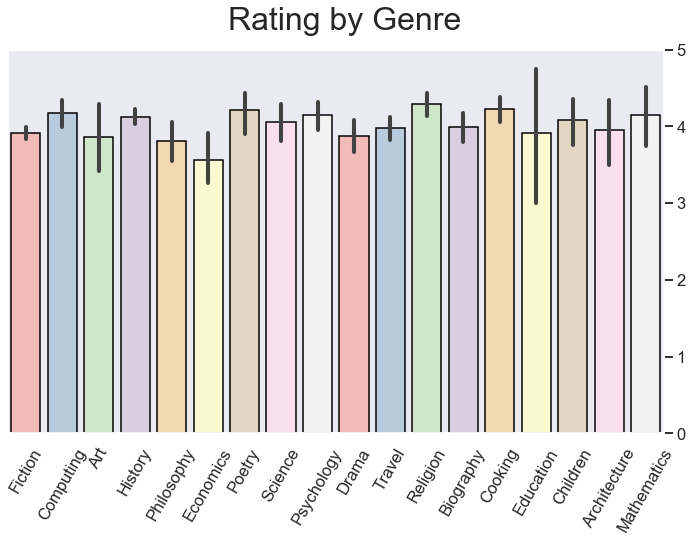

In [106]:
sns.set(style='dark', context='talk')
palette = sns.color_palette("Pastel1")

f, ax = plt.subplots(figsize=(10,8))
f.suptitle('Rating by Genre', ha='center', fontsize=32)
ax = sns.barplot('categories', 'averageRating', data=df,
                 palette=palette, edgecolor='black')
ax.set_xlabel('')
ax.set_xticklabels(labels=df.categories.unique(), rotation=60)
ax.set_ylabel('', rotation=270, fontsize=12)
ax.yaxis.set_label_position('right')
ax.yaxis.set_label_coords(1.095, 0.5)
ax.yaxis.tick_right()
plt.ylim(0,5)
f.tight_layout(rect=[0, 0.03, 1, 0.95])

In [97]:
author_count = df.authors.value_counts()
popular_authors = list(author_count[author_count >= 3].index)

def popular_author(x):
    if x in popular_authors:
        return 1
    else:
        return 0

df['popular_author'] = df['authors'].map(lambda x: popular_author(x))

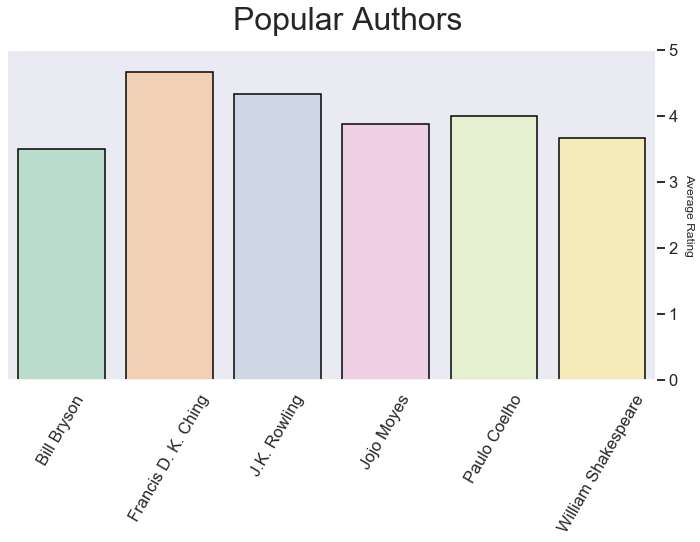

In [105]:
sns.set(style='dark', context='talk')
palette = sns.color_palette("Pastel2")

f, ax = plt.subplots(figsize=(10,8))
f.suptitle('Popular Authors', ha='center', fontsize=32)
ax = sns.barplot(df[df['popular_author'] == 1].groupby('authors')['averageRating'].mean().index, 
                 df[df['popular_author'] == 1].groupby('authors')['averageRating'].mean().iloc[:], data=df,
                 palette=palette, edgecolor='black')
ax.set_xlabel('')
ax.set_xticklabels(labels=df[df['popular_author'] == 1].groupby('authors')['averageRating'].mean().index, rotation=60)
ax.set_ylabel('Average Rating', rotation=270, fontsize=12)
ax.yaxis.set_label_position('right')
ax.yaxis.set_label_coords(1.058, 0.5)
ax.yaxis.tick_right()
plt.ylim(0,5)
f.tight_layout(rect=[0, 0.03, 1, 0.95])